____________________
# Music 255: CRIM, XML, MEI, BeautifulSoup

In this Notebook, you can find an array of tools and techniques useful for navigating and analyzing MEI and XML files. 

* **Beautiful Soup's** documentation [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [here](https://tedboy.github.io/bs4_doc/index.html)
* **XML** documentation can be found [here](https://www.w3schools.com/xml/xml_syntax.asp)
* **MEI** documentation and tools [here](https://music-encoding.org/).


#### Find your pieces from the CRIM Corpus:
Each of you will focus on ONE model and its derivative Mass. Find your set [here](https://docs.google.com/spreadsheets/d/140JbgdPz1yBsbnF_umN3iq-nmC9drLgBtJ9Qd4hk6zE/edit#gid=0).

------
#### Setup: Importing Python Libraries

In [4]:
import os
from bs4 import BeautifulSoup as bs
import optparse
import sys
from pathlib import Path
import requests
import pandas as pd
from lxml import etree
import re
from collections import Counter
import glob
import verovio
from IPython.display import SVG, HTML
import matplotlib.pyplot as plt

In [2]:
# All Beautiful Soup Methods

dir(bs)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_decode_markup',
 '_event_stream',
 '_feed',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descenda

----
### Section 1: Piece

In this part, we'll import a piece and investigate it starting with its **metadata**.

#### Step 1.1: Importing a file

If working **locally**, a good way to import a file is:

In [3]:
# Only use this for a LOCAL file!
# storing the local path
xml_doc = "CRIM_Model_0005.mei"

# opening and reading into a Soup object
with open(xml_doc) as file:
    soup_mei = bs(file, 'xml')

FileNotFoundError: [Errno 2] No such file or directory: 'CRIM_Model_0005.mei'

If working **remotely**, a good way to GET an MEI file at a URL is:

In [5]:
# function to extract xml document from given url
def getXML(url):
    # request for HTML document of given url
    response = requests.get(url)    
    # response will be provided in JSON format
    return response.text

# store URL
my_piece_url = "https://crimproject.org/mei/CRIM_Model_0001.mei"
# store response
remote_document = getXML(my_piece_url)
# convert to Soup
remote_soup_mei = bs(remote_document, 'xml')
soup_mei = remote_soup_mei

-----
### Step 2: Brief Look at the Data

In this section, we'll look at the raw version of the piece, its general contents, structure, authors, and other elements. We'll also search through tags and elements!

#### Step 2.1: Raw Data

We can print the XML contents of a file pretty easily:

In [6]:
print(soup_mei.prettify())

<?xml version="1.0" encoding="utf-8"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<mei meiversion="4.0.1" xml:id="m-1" xmlns="http://www.music-encoding.org/ns/mei">
 <meiHead xml:id="m-2">
  <fileDesc xml:id="m-3">
   <titleStmt>
    <title>
     Veni speciosam
    </title>
    <respStmt>
     <persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">
      Johannes Lupi
     </persName>
     <persName role="editor">
      Marco Gurrieri
     </persName>
     <persName role="editor">
      Bonnie Blackburn
     </persName>
     <persName role="editor">
      Vincent Besson
     </persName>
     <persName role="editor">
      Richard Freedman
     </persName>
    </respStmt>
   </titleStmt>
   <pubStmt>
    <publisher>

#### Step 2.2: Overview

As you might have noticed, MEI documents consist of elements (marked by tags). Let's look at **all tags in this document**:

In [24]:
# find all the tags in the XML document, including the details of their contents
soup_mei.find_all(True)

[<mei meiversion="4.0.1" xml:id="m-1" xmlns="http://www.music-encoding.org/ns/mei">
 <meiHead xml:id="m-2">
 <fileDesc xml:id="m-3">
 <titleStmt><title>Veni speciosam</title><respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Bonnie Blackburn</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName><persName role="Analyst">Oleh Shostak</persName></respStmt></titleStmt><pubStmt><publisher>
       Citations: The Renaissance Imitation Mass Project
   </publisher><distributor>Centre d'Études Supérieures de la Renaissance </distributor><distributor> Haverford CollegeMarco Gurrieri </distributor><distributor> Bonnie Blackburn </distributor><distributor> Vincent Besson </distributor><distributor> Richard Freedman</distributor><date isodate="2023-02-06"/><availability>This work is licensed under a Creative Com

In [25]:
# or the names of the tags (without contents)
for tag in soup_mei.find_all(True):
    print(tag.name)

mei
meiHead
fileDesc
titleStmt
title
respStmt
persName
persName
persName
persName
persName
persName
pubStmt
publisher
distributor
distributor
distributor
distributor
distributor
date
availability
encodingDesc
appInfo
application
name
application
name
application
name
application
name
workList
work
title
composer
persName
classification
termList
term
manifestationList
manifestation
identifier
titleStmt
title
pubStmt
publisher
persName
date
physLoc
repository
corpName
settlement
identifier
music
body
mdiv
score
scoreDef
staffGrp
staffGrp
staffDef
label
instrDef
staffDef
label
instrDef
staffDef
label
instrDef
staffDef
label
instrDef
staffDef
label
instrDef
section
measure
tie
staff
layer
note
verse
syl
note
verse
syl
staff
layer
mRest
staff
layer
mRest
staff
layer
mRest
staff
layer
mRest
measure
staff
layer
note
note
verse
syl
note
verse
syl
note
verse
syl
staff
layer
rest
note
verse
syl
staff
layer
mRest
staff
layer
mRest
staff
layer
mRest
measure
staff
layer
note
note
note
note
staff
la

We can **find specific tags**, too:

* Note that in an XML document you can specify some part of the tree on the way to the individual child tag, or go directly to those tags.  This could be useful if some element is reused at different places in your XML schema.

>`soup_mei.titleStmt.find_all("persName")`

or

>`soup_mei.find_all("persName")`

In [26]:
soup_mei.titleStmt.find_all("persName")

[<persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Bonnie Blackburn</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>,
 <persName role="Analyst">Oleh Shostak</persName>]

And filter for those with a certain **attribute value**.

* Note that the values are specified as a dictionary:  `{'your_key': 'your_value'}` along with the tag name.

>`soup_mei.find_all("persName", {"role": "editor"})`

In [10]:
soup_mei.find_all("persName", {"role": "editor"})

[<persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Bonnie Blackburn</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

Sometimes, you might be working for scraping/analysis tools and would want to access the **contents (text)** of individual tags:

>`for tag in soup_mei.find_all("persName", {"role": "editor"}):
    print(tag.text.strip())`
    
The `.strip()` function assures that we remove whitespace and other useless code.

In [27]:
for tag in soup_mei.find_all("persName", {"role": "editor"}):
    print(tag.text.strip())

Marco Gurrieri
Bonnie Blackburn
Vincent Besson
Richard Freedman


Similarly, we can easily access the composer:

In [12]:
# the text of the composer element:
soup_mei.composer.text.strip()

'Johannes Lupi'

And the title:

In [28]:
# the text of the title element:
soup_mei.title.text.strip()

'Veni speciosam'

-----
### Step 3: Basics of Analysis

In this section, we'll start looking into how you would approach analyzing a CRIM piece.

#### Step 3.1: Staves, Measures, Notes

First, let's look at just one staff:

In [29]:
# just the first
soup_mei.staffDef

<staffDef clef.line="2" clef.shape="G" key.sig="1f" label="Superius" lines="5" n="1" xml:id="m-30">
<label>Superius</label>
<instrDef midi.channel="1" midi.pan="26" midi.volume="100" xml:id="m-32"/>
</staffDef>

Next, **find all staves**:

* Notice that these are returned as a **list** object, so we can easily also run this with a **for** loop.  

>`soup_mei.find_all("staffDef")`

* Beautiful Soup responses are "list ready".  Thus the first staff is `soup_mei.find_all("staffDef")[0]`.  The last staff is `soup_mei.find_all("staffDef")[-1]`.

In [30]:
# returns a list of ALL staves
soup_mei.find_all("staffDef")

[<staffDef clef.line="2" clef.shape="G" key.sig="1f" label="Superius" lines="5" n="1" xml:id="m-30">
 <label>Superius</label>
 <instrDef midi.channel="1" midi.pan="26" midi.volume="100" xml:id="m-32"/>
 </staffDef>,
 <staffDef clef.line="2" clef.shape="G" key.sig="1f" label="Contratenor" lines="5" n="2" xml:id="m-33">
 <label>Contratenor</label>
 <instrDef midi.channel="1" midi.pan="46" midi.volume="100" xml:id="m-35"/>
 </staffDef>,
 <staffDef clef.dis="8" clef.dis.place="below" clef.line="2" clef.shape="G" key.sig="1f" label="PrimusTenor" lines="5" n="3" xml:id="m-36">
 <label>PrimusTenor</label>
 <instrDef midi.channel="1" midi.pan="81" midi.volume="100" xml:id="m-38"/>
 </staffDef>,
 <staffDef clef.dis="8" clef.dis.place="below" clef.line="2" clef.shape="G" key.sig="1f" label="SecundusTenor" lines="5" n="4" xml:id="m-39">
 <label>SecundusTenor</label>
 <instrDef midi.channel="1" midi.pan="81" midi.volume="100" xml:id="m-41"/>
 </staffDef>,
 <staffDef clef.dis="8" clef.dis.place="be

We can use the collection of Staves to figure out **what voices** are used in a piece:

In [31]:
for staff in soup_mei.find_all('staffDef'):
    print(staff.text.strip())

Superius
Contratenor
PrimusTenor
SecundusTenor
Bassus


Now, we can look for **specific staves** that satisfy our conditions:

In [17]:
# find ALL STAVES with a GIVEN CLEF by passing dictionary that specifies the requested type
# the final_all results are a bs list

# Get all Gs first
staves = soup_mei.find_all("staffDef", {'clef.shape': "G"})

# print cleaned-up text
for staff in staves:
    print(staff.text.strip())

Superius
Contratenor
PrimusTenor
SecundusTenor
Bassus


-----

### Step 3.2: Working with Children,  Siblings, and Parents

* First, let's find all **children** of the title Statement:


In [32]:
# all the children of titleStmt.  What are they, and how long?
for item in soup_mei.titleStmt.children:
    print(item.name)

title
respStmt


In [33]:
# findChildren is a list, and so we can pick individual items
# titleStmt = soup_mei.titleStmt.findChildren()
soup_mei.titleStmt.parent

<fileDesc xml:id="m-3">
<titleStmt><title>Veni speciosam</title><respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Bonnie Blackburn</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName><persName role="Analyst">Oleh Shostak</persName></respStmt></titleStmt><pubStmt><publisher>
      Citations: The Renaissance Imitation Mass Project
  </publisher><distributor>Centre d'Études Supérieures de la Renaissance </distributor><distributor> Haverford CollegeMarco Gurrieri </distributor><distributor> Bonnie Blackburn </distributor><distributor> Vincent Besson </distributor><distributor> Richard Freedman</distributor><date isodate="2023-02-06"/><availability>This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License</availability></pubStmt></fileDesc>

In [34]:
#recursive also gives a list
soup_mei.titleStmt.findChildren(recursive=True)

[<title>Veni speciosam</title>,
 <respStmt><persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName><persName role="editor">Marco Gurrieri</persName><persName role="editor">Bonnie Blackburn</persName><persName role="editor">Vincent Besson</persName><persName role="editor">Richard Freedman</persName><persName role="Analyst">Oleh Shostak</persName></respStmt>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Bonnie Blackburn</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>,
 <persName role="Analyst">Oleh Shostak</persName>]

### Step 3.2b A report of siblings begins *after* the first instance of that tag.

Thus `soup_mei.titleStmt.persName` will find the first element of that type.  `soup_mei.titleStmt.persName.findNextSiblings()` will find all the siblings within that parent *after* the first element.

In [35]:
# these are the NEXT sibs (after the first!)
names = soup_mei.titleStmt.persName.findNextSiblings()
names

[<persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Bonnie Blackburn</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>,
 <persName role="Analyst">Oleh Shostak</persName>]

### Step 3.2c Looking Parents allows us to go up the tree.

* Here we can find the tags going up from the bottom level of note:

>`for parent in soup_mei.note.find_parents():`
>>`print(parent.name)`

In [36]:
for parent in soup_mei.note.find_parents():
    print(parent.name)

layer
staff
measure
section
score
mdiv
body
music
mei
[document]


### Step 3.2c. You can add tags by looking up to the parent of a given tag.



In [37]:
people_involved_parent = soup_mei.find("persName").parent
new_person_tag = soup_mei.new_tag("persName", role="Analyst")
new_person_tag.string = "Oleh Shostak"
people_involved_parent.append(new_person_tag)

soup_mei.find_all("persName")

[<persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName>,
 <persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Bonnie Blackburn</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>,
 <persName role="Analyst">Oleh Shostak</persName>,
 <persName role="Analyst">Oleh Shostak</persName>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/42035469" role="composer">Johannes Lupi</persName>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/59135590">Pierre Attaingnant</persName>]

In [39]:
people_involved_parent.name


'respStmt'

### Step 4.  Counting Notes

We already know how to find the first note (of the first staff in the first bar):

>`soup_mei.note.get('pname')`

But we can also **find_all** notes, count and sort them by value:

>`len(soup_mei.find_all('note'))`

In [40]:
# gets just the first pitch
soup_mei.note.get('pname')

'g'

In [41]:
# how many notes?
len(soup_mei.find_all('note'))

1933

In [27]:
# gets just the first pitch
soup_mei.note.get('pname')

'g'

In [28]:
# find all the notes and print pitch names
for note in soup_mei.find_all(name='note'):
    print(note.get('pname'))

g
d
d
c
d
f
d
e
d
c
a
g
f
b
d
c
b
g
b
a
g
b
a
g
b
a
g
f
d
e
f
g
a
g
d
b
c
a
a
d
g
f
d
c
d
f
d
g
b
a
g
f
d
f
e
d
c
a
g
f
a
g
a
e
d
e
f
e
b
d
c
g
b
a
g
f
g
a
g
d
c
b
a
b
g
d
f
e
f
g
g
d
g
f
e
f
a
g
a
d
c
d
f
e
d
e
f
g
d
c
d
f
a
a
f
g
a
d
e
d
a
b
c
b
a
b
e
d
c
a
d
a
e
d
e
f
g
f
e
d
a
b
c
c
a
c
a
b
a
a
g
e
f
b
d
a
d
c
d
e
a
f
g
a
f
a
g
f
e
d
d
b
c
d
c
b
f
d
e
d
d
a
g
f
e
d
a
d
e
d
e
f
g
a
e
f
d
d
b
c
d
c
b
a
d
d
b
c
d
f
a
g
a
b
f
e
d
a
c
b
d
f
e
e
d
d
b
a
g
f
g
g
a
b
c
d
e
d
b
c
d
c
b
d
c
b
c
d
a
c
b
f
d
e
d
a
g
g
a
b
c
d
c
g
f
d
e
g
a
d
b
c
c
b
g
a
f
g
e
d
c
g
f
d
e
d
b
a
b
c
d
a
a
b
c
d
f
g
e
d
d
g
a
g
a
b
b
a
b
c
a
d
d
e
f
g
g
f
e
d
g
d
c
b
d
c
d
c
a
g
f
g
c
b
e
d
a
g
b
a
g
d
f
e
g
a
b
c
d
c
g
f
d
e
a
b
a
g
e
d
d
c
a
g
a
b
c
c
b
g
a
f
g
e
f
d
g
f
f
e
d
c
d
g
a
b
c
a
d
c
d
g
d
c
b
a
b
g
b
a
b
c
d
g
g
d
g
g
d
d
g
d
d
c
b
a
b
g
f
e
f
g
a
f
d
c
d
f
a
d
d
a
g
f
e
f
e
d
c
d
a
g
f
a
g
a
c
d
a
b
c
d
e
f
d
e
d
c
g
b
a
g
c
b
a
a
g
f
e
d
f
d
c
d
d
f
f
g
d
e
f
g
a
c
d
a
a
e
f
e
d
c
d
a
b
c
b
a
d
a


Using some of the familiar techniques, we can count **pitches** and put them in a **series** or **DataFrame**:

In [42]:
# counts pitches all voices, now as dictionary
pitches = [n.get('pname') for n in soup_mei.find_all('note')]
counted = Counter(pitches)


counted_notes = pd.Series(counted).to_frame('count').sort_index()
counted_notes

count
a    277
b    227
c    262
d    410
e    209
f    216
g    332

In [43]:
# count pitches in one voice:

measures = soup_mei.find_all('measure')
pitches = []
# here we assume the superius is the first staff
superius_bars = [soup_mei.find_all('staff', {"n": "1"}) for measure in measures]
for superius in superius_bars[0]:
    notes = superius.find_all('note')
    for note in notes:
        pitch = note.get('pname')
        pitches.append(pitch)
pitches_counted = Counter(pitches)
superius_pitch_count = pd.Series(pitches_counted).to_frame('count').sort_index()
superius_pitch_count


count
a     67
b     64
c     70
d     99
e     29
f     27
g     46

And create a histogram

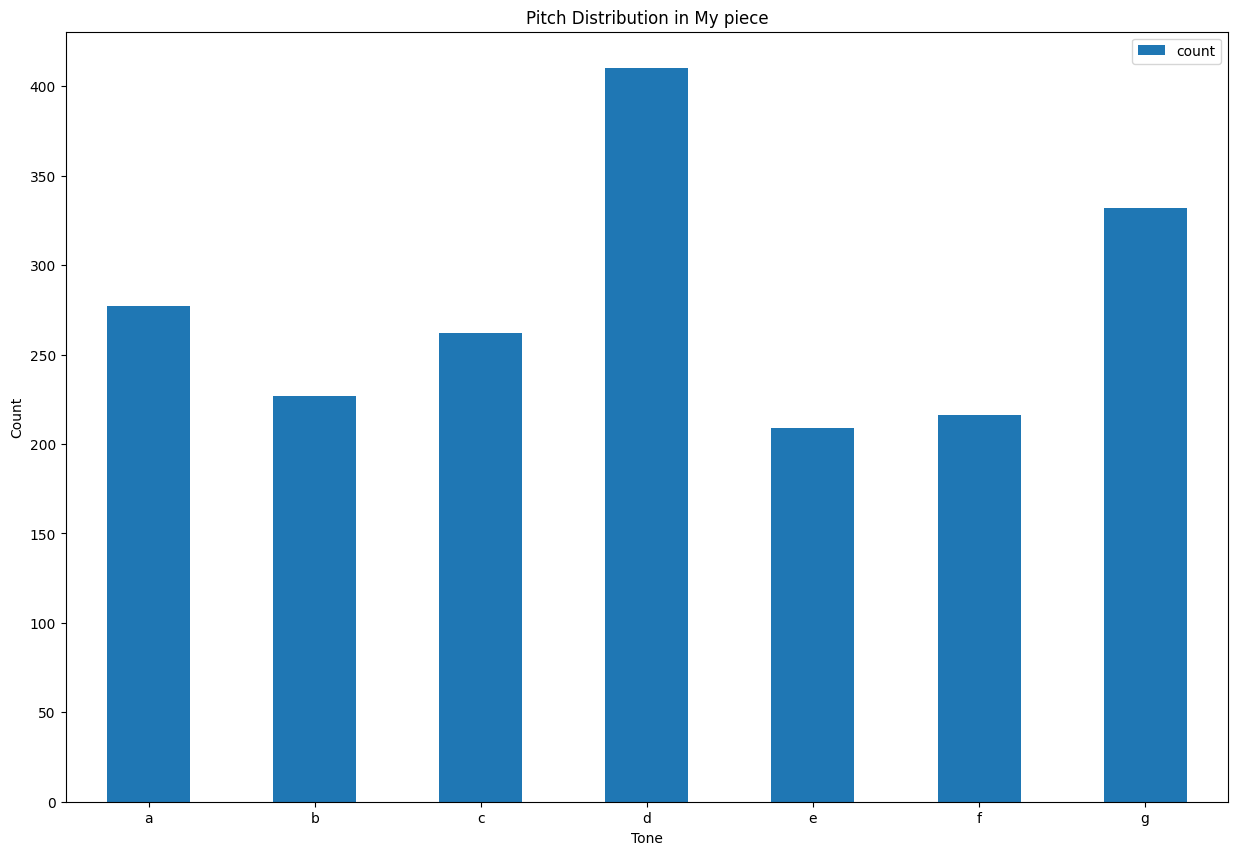

In [44]:
counted_notes.plot(kind="bar", figsize=(15, 10))
plt.title("Pitch Distribution in My piece")
plt.xticks(rotation = 0)
plt.xlabel("Tone")
plt.ylabel("Count")
plt.show()


#### Working with Measures

It is oftentimes useful to look at **measures** – either all at once or specific ones. Here's an example:

In [92]:
# last pitch in last measure, for each voice
measures = soup_mei.find_all('measure')
last_measure = measures[-1]
for staff in last_measure.find_all('staff'):
        note = staff.find_all('note')[-1]
        print(note.get('pname'))


e


Working with **Score Definitions** (scoreDef), it is possible to search for certain **events** within the piece. For example, find out where a **Time Signature change** occurs:

In [99]:
scoredefs = soup_mei.find_all('scoreDef')
for scoredef in scoredefs:
    print(scoredef.get('meter.count'))
    print(scoredef.get('meter.unit'))
    next_measure = scoredef.find_next('measure', )
    print("The first bar with this TS is " + next_measure.get('n'))

4
2
The first bar with this TS is 1
8
2
The first bar with this TS is 71
4
2
The first bar with this TS is 72
8
2
The first bar with this TS is 134


Finally, we can look for some very specific things, like **all notes with a particular duration, pitch, and octave**:

* Use dictionary of key/value pairs to specify particular attributes.

>`soup_mei.find_all('note', {'dur': "4", 'pname': "g", 'oct': '3'})`

In [29]:

soup_mei.find_all('note', {'dur': "4", 'pname': "g", 'oct': '3'})

[<note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-323"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-421"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-635"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-1200"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-1503">
 <verse n="1" xml:id="m-1553">
 <syl con="d" wordpos="m" xml:id="m-1554">
             bi
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-1544"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="43" stem.dir="up" xml:id="m-2519"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="55" stem.dir="up" xml:id="m-2539">
 <verse n="1" xml:id="m-2601">
 <syl con="d" wordpos="m" xml:id="m-2602">
             sa
            </syl>
 </verse>
 </note>,
 <note dur="4" dur.ppq="256" 

### 4.0 Display your MEI with Verovio

* Verovio will render your piece directly in the Notebook.  It's the same library we use for CRIM.

[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>


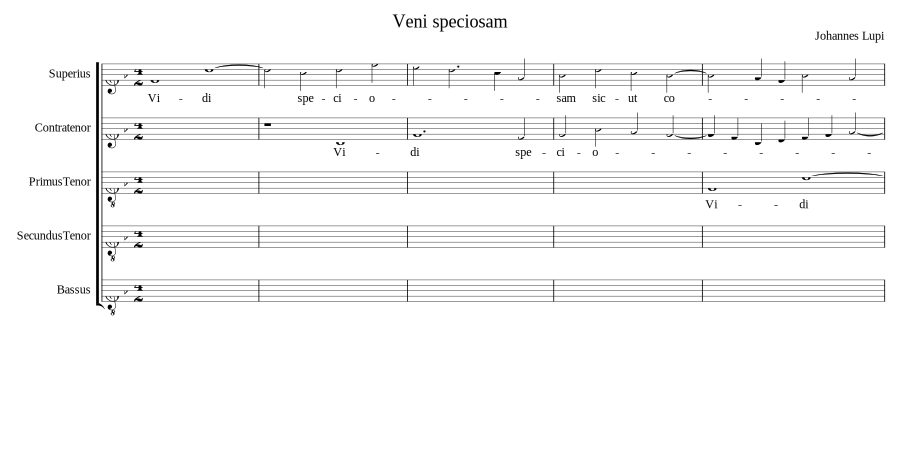

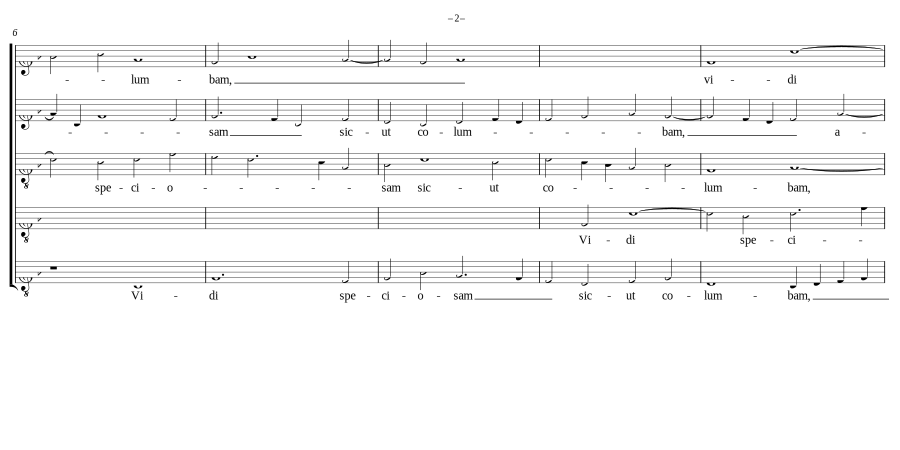

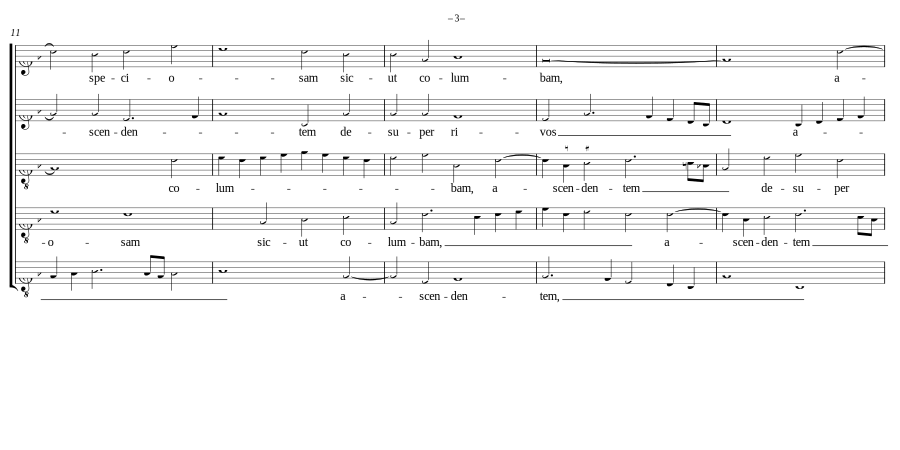

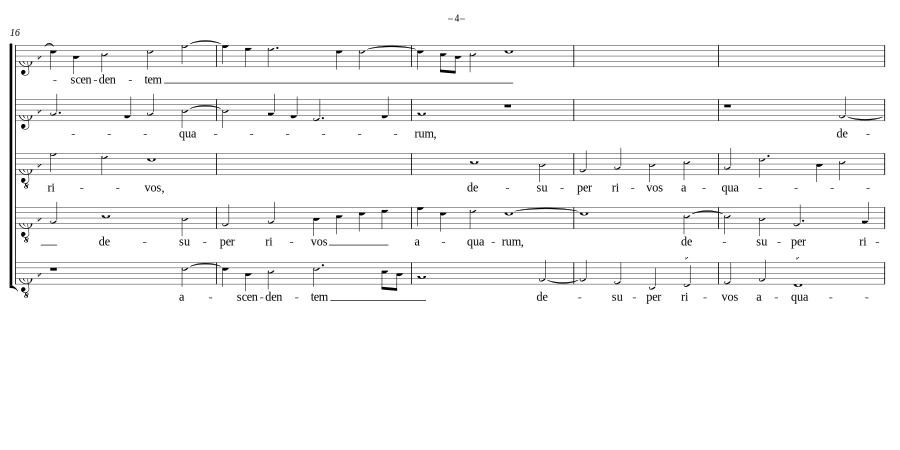

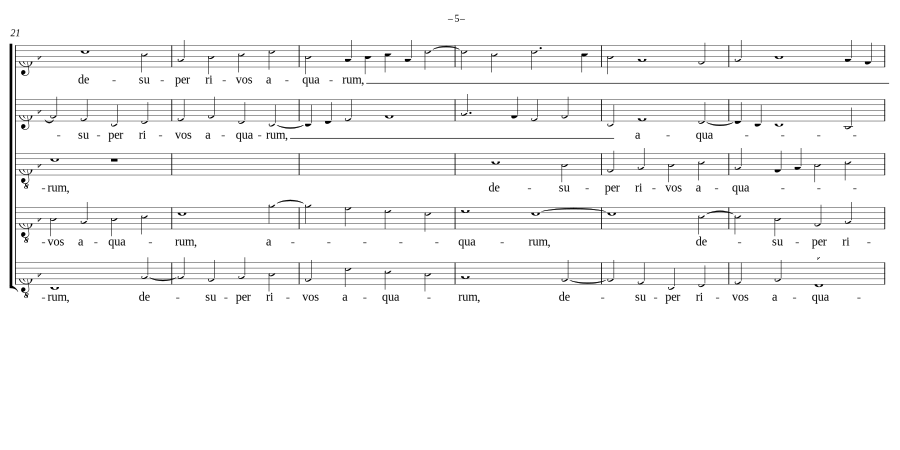

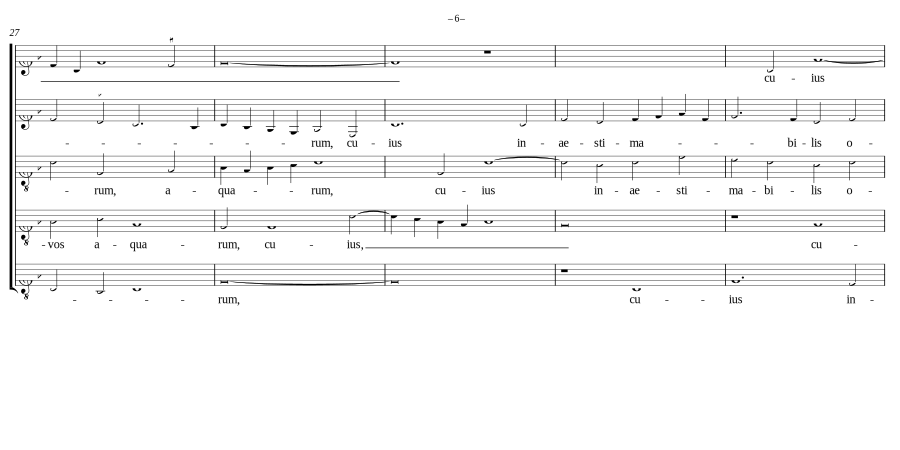

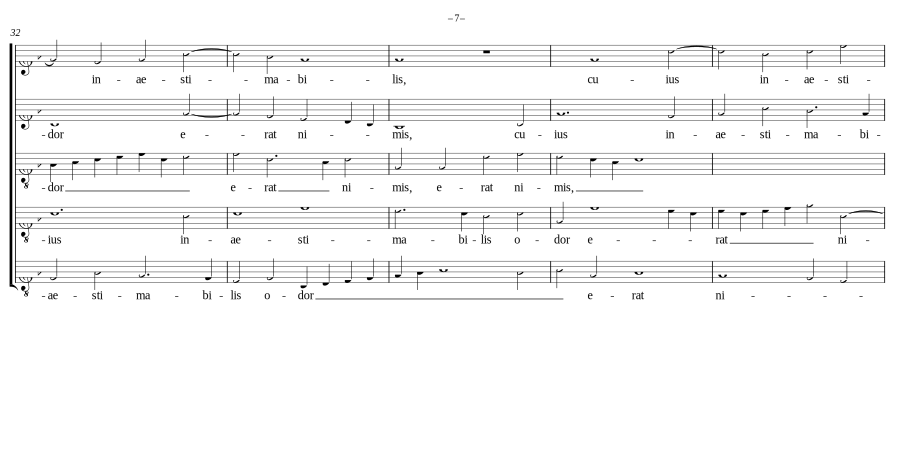

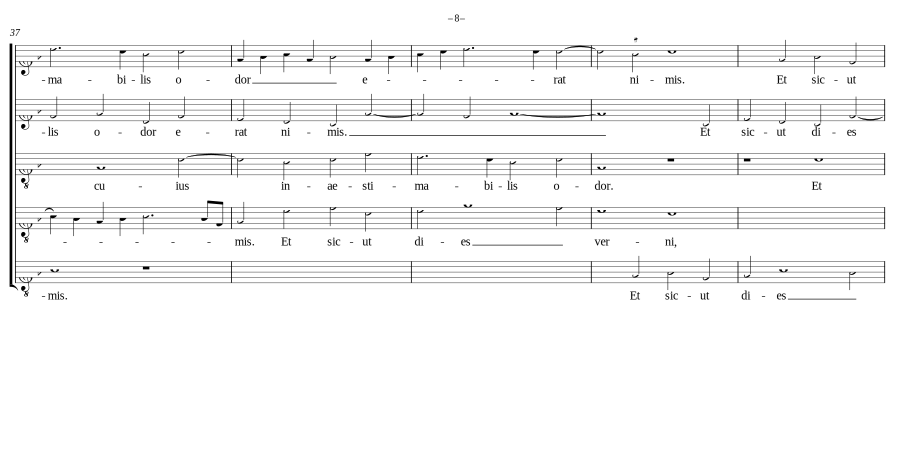

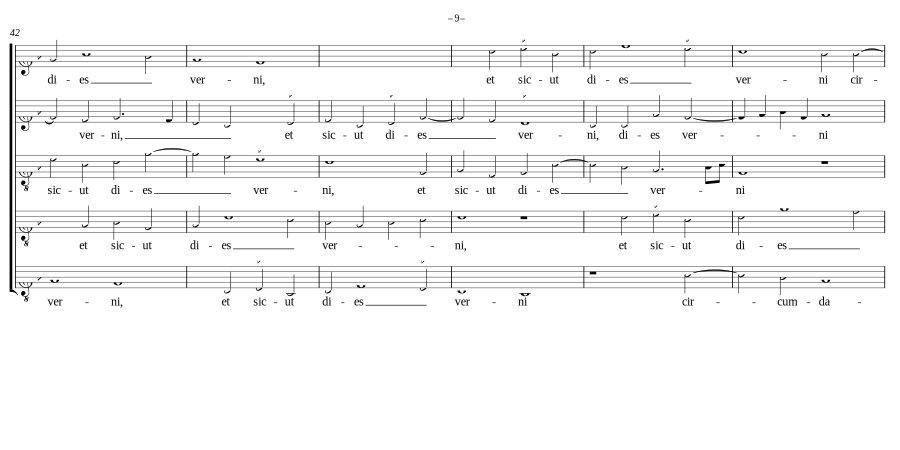

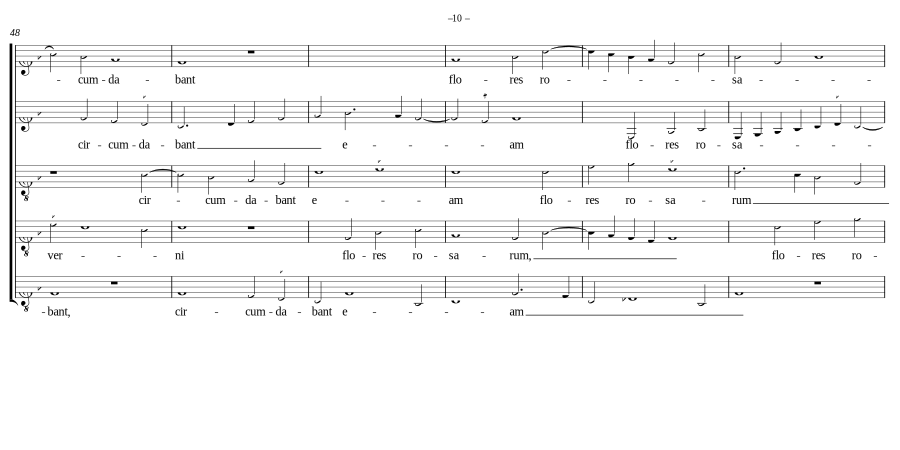

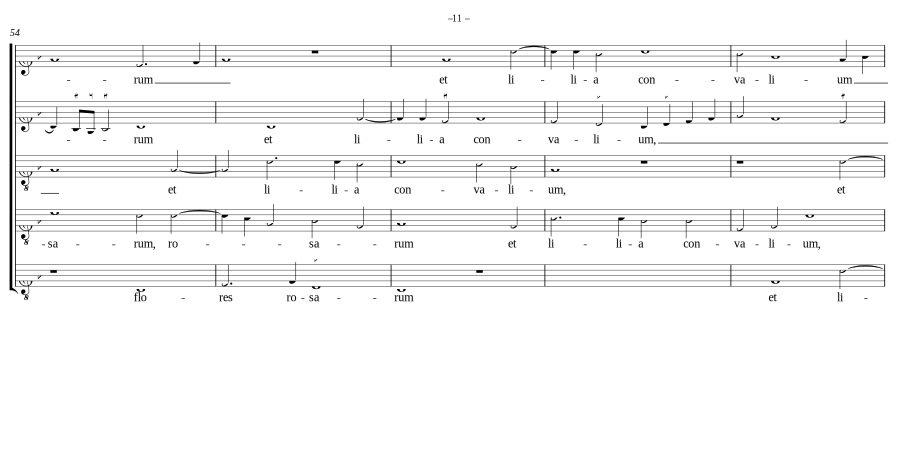

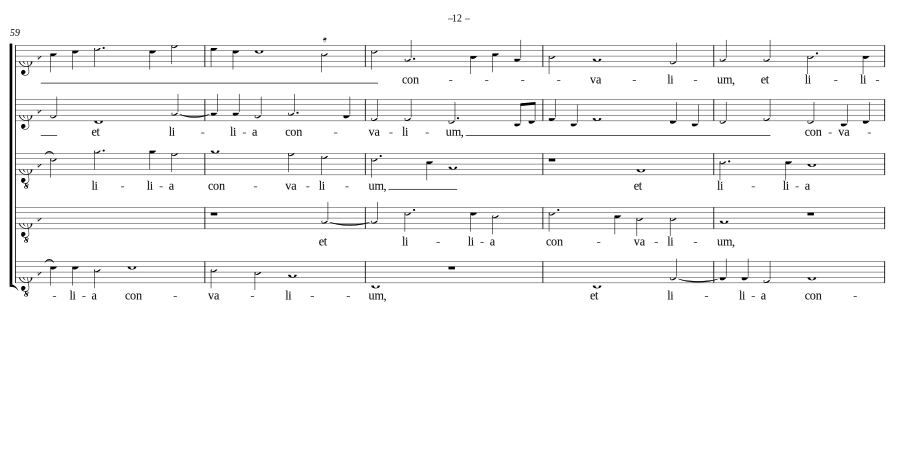

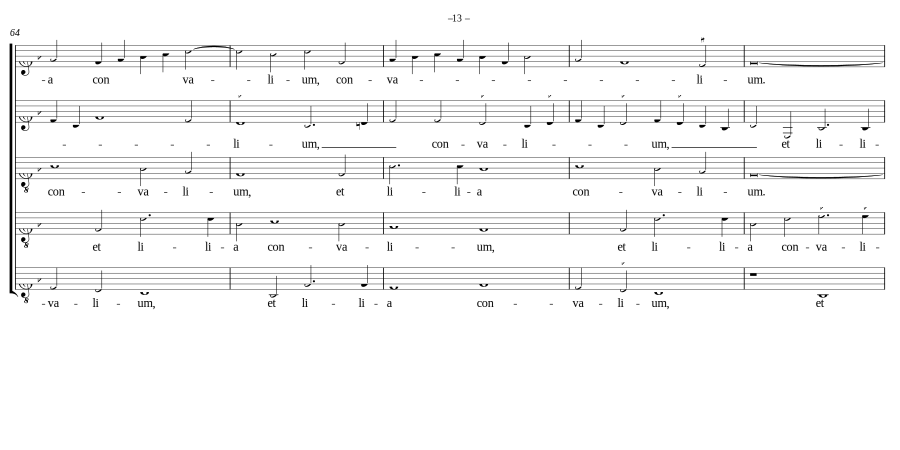

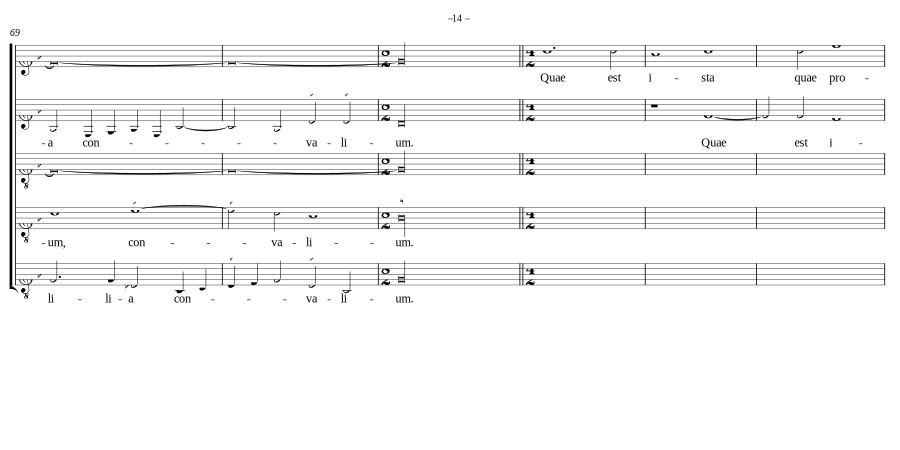

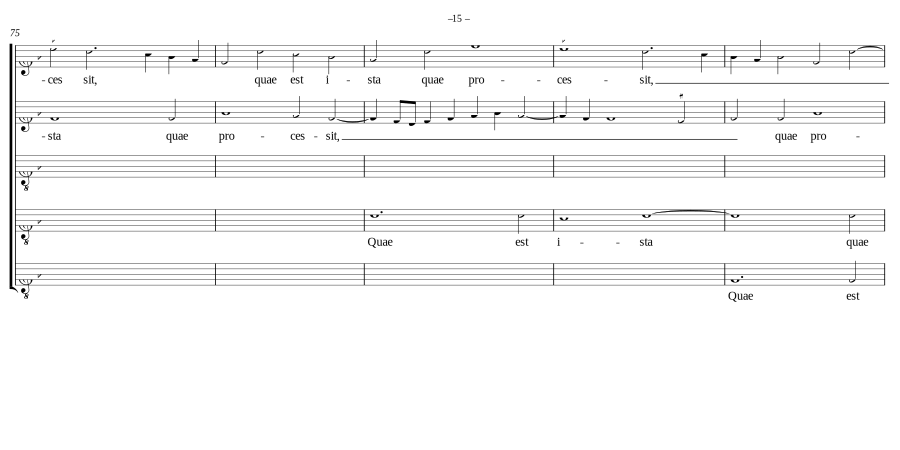

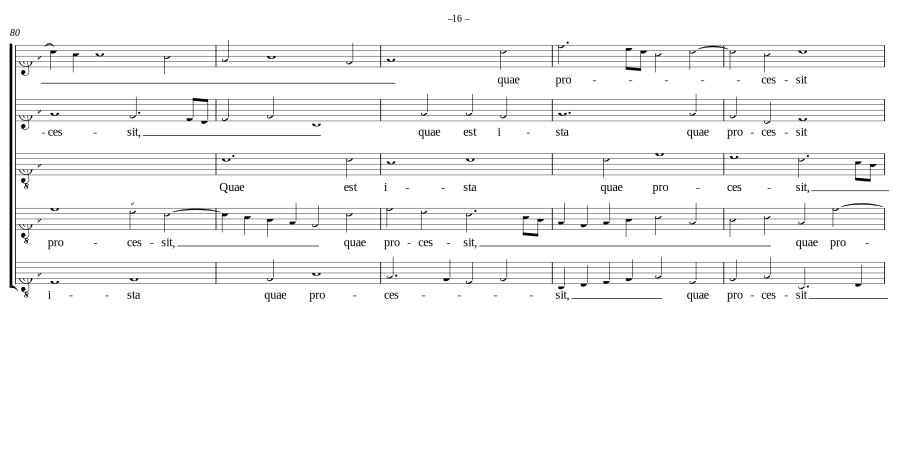

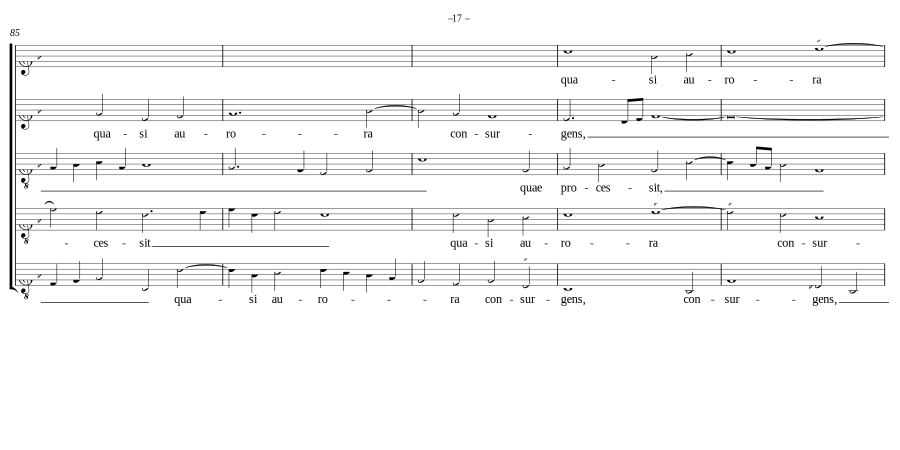

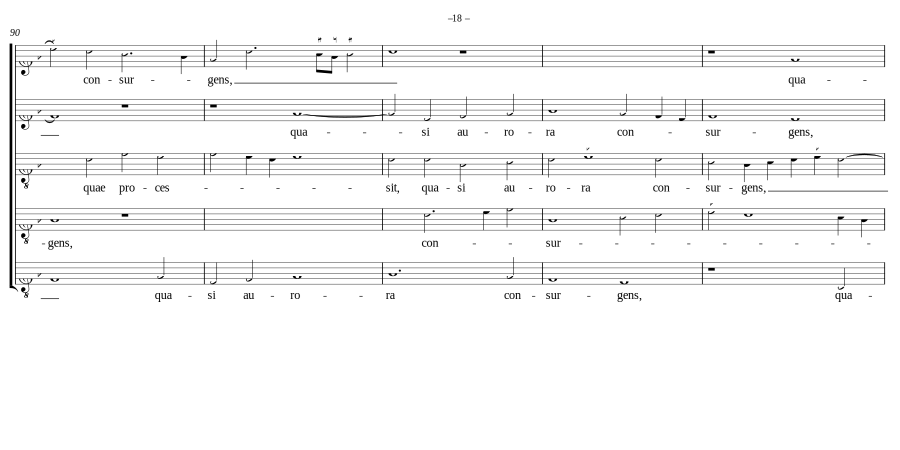

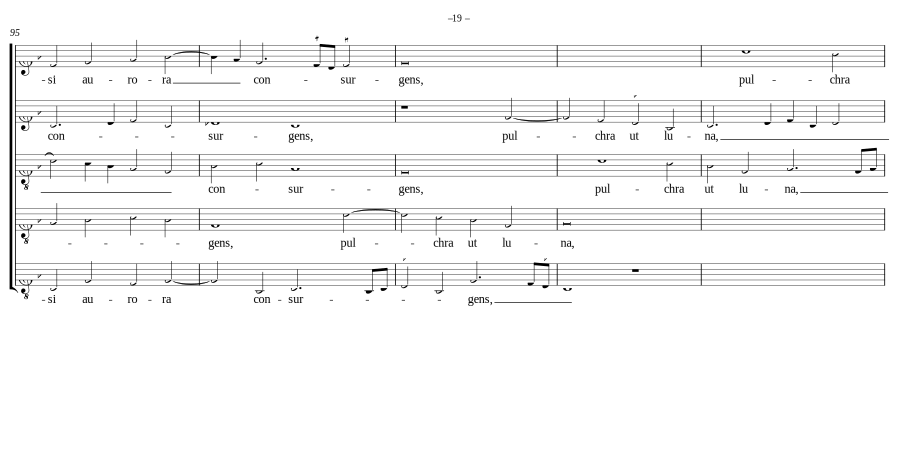

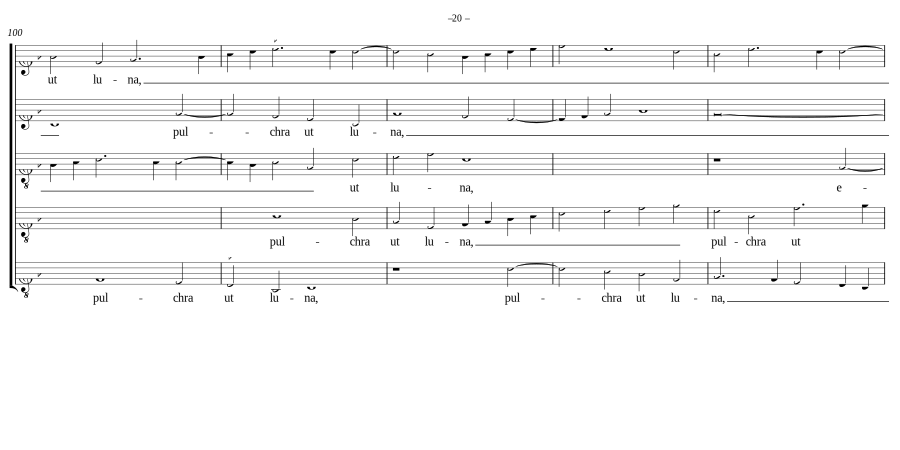

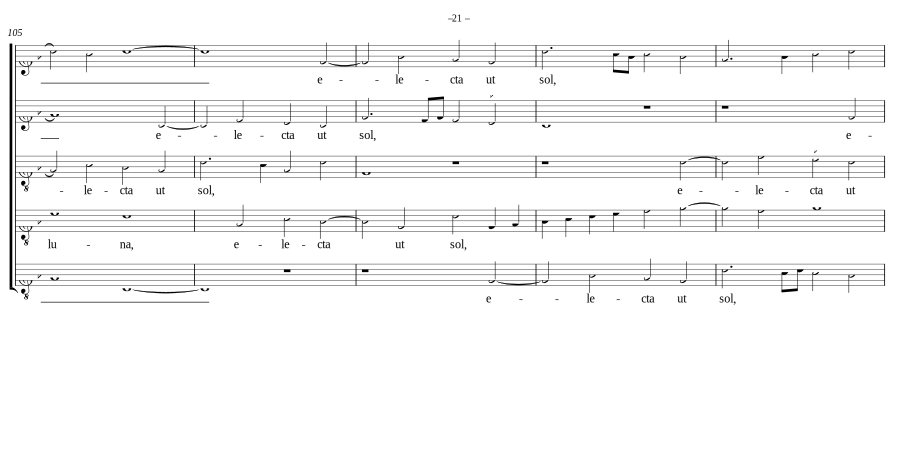

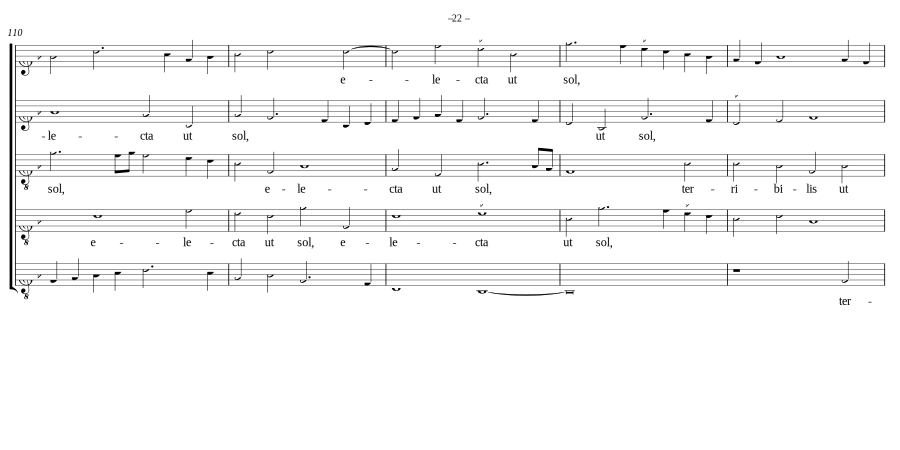

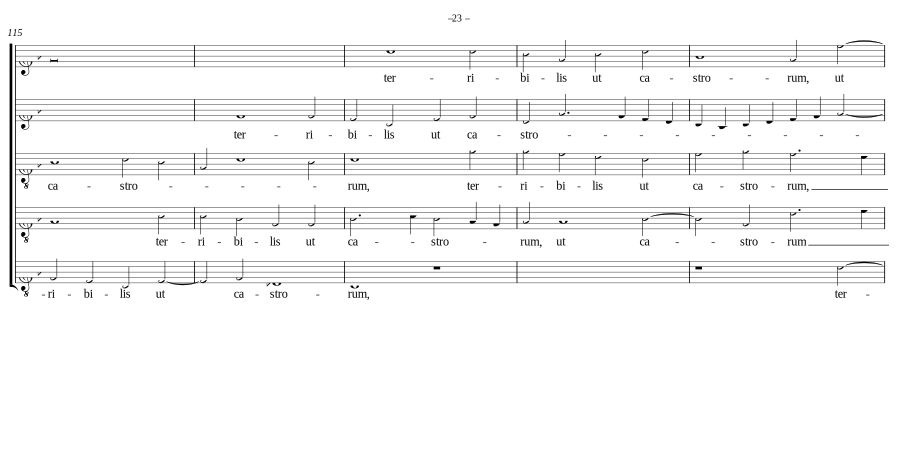

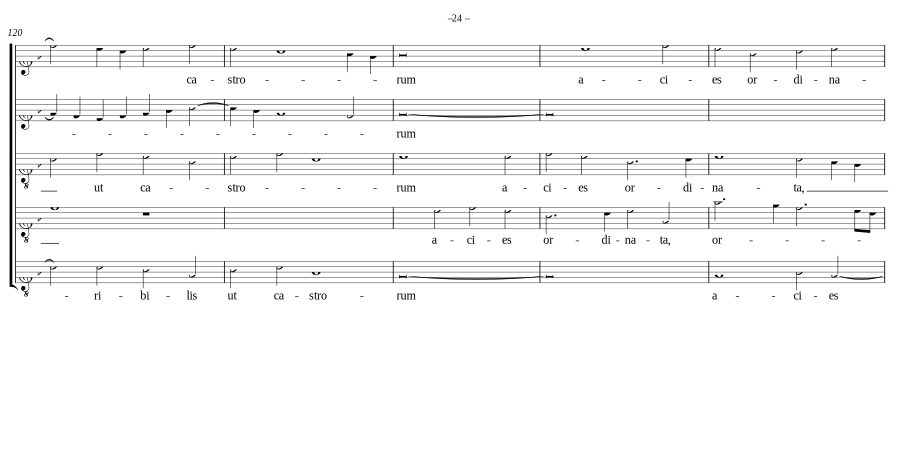

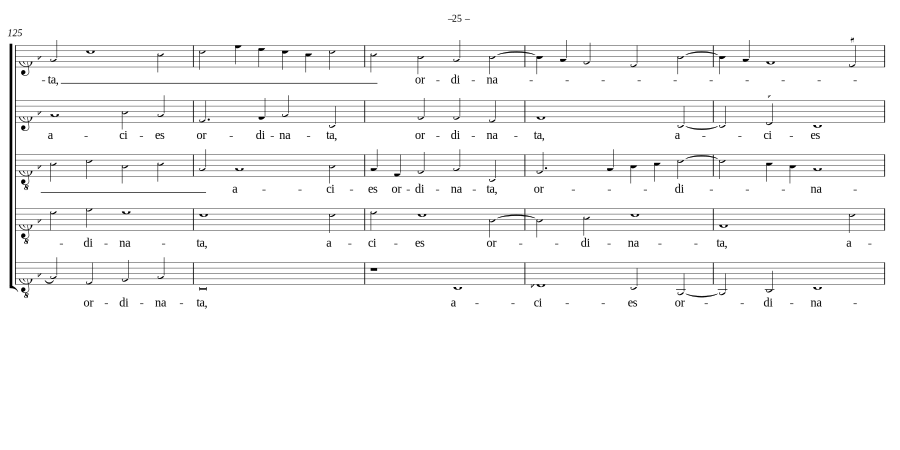

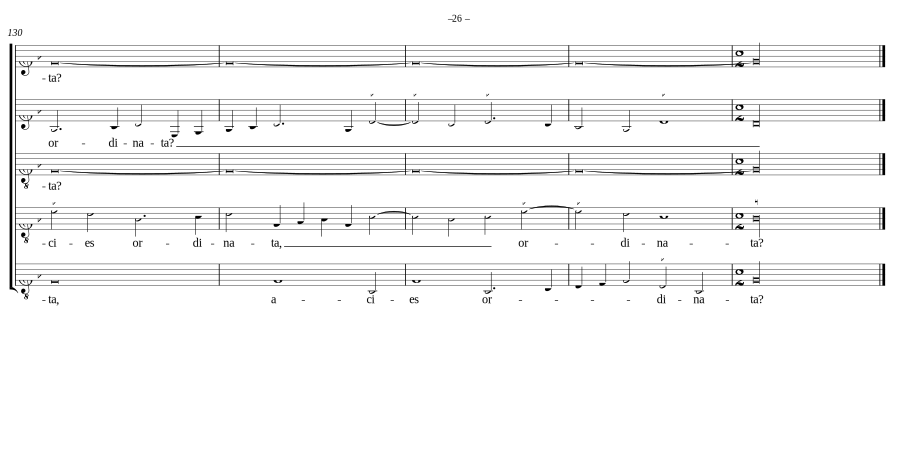

In [40]:


my_piece_url
response = requests.get(my_piece_url)
fetched_mei_string = response.text
# start the verovio toolkit and load the file there
tk = verovio.toolkit()
tk.loadData(fetched_mei_string)
tk.setScale(30)
tk.setOption( "pageHeight", "1500" )
tk.setOption( "pageWidth", "3000" )

tk.redoLayout()
# get the number of pages and display the music
count = tk.getPageCount()
for c in range(1, count + 1):
    music = tk.renderToSVG(c)
    display(SVG(music))

### 5.0 Save Revised XML document

In [49]:
# regular expression to get CRIM Piece Id from URL:
title = re.findall("[^\\|/]+$", my_piece_url)[0]
# Save with that CRIM ID as part of title
f = open(title + '_' + 'rev' + '.mei', "w")
f.write(str(soup_mei))
f.close()

In [96]:
# BULK IMPORT LOCAL FILES

for name in glob.glob('/Users/rfreedma/Documents/CRIM_Python/1520s-Project/Xml/Wil/*.mei'):
